In [2]:
from aggmap import loadmap
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, log_loss
import warnings, os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from tqdm import tqdm


warnings.filterwarnings("ignore")


2022-08-02 12:47:39.295098: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from fmp import CalcFeatImp

In [4]:
dfx0 = pd.read_excel('./CRC.xlsx', sheet_name='data')
dfx0 = dfx0[dfx0.columns[1:]]
dfx = np.log(dfx0 + 1e-8)

feature_groups_df = pd.read_excel('./CRC.xlsx', sheet_name='feature_info')
feature_group_list = feature_groups_df.Group.tolist()

dfy_all = pd.read_excel('./CRC.xlsx', sheet_name='sample_info')
dfy = pd.get_dummies(dfy_all['Group'])


X = dfx.values.astype(float)
Y = dfy.values.astype(float)

In [5]:
country_idx = dfy_all.groupby(['Country']).apply(lambda x:x.index.tolist())
country_names = country_idx.index.tolist()

In [6]:
country_names

['AUS', 'CHI', 'FRA', 'GER', 'USA']

In [7]:
model_save_path = './model'
mp = loadmap('./model/aggmap.mp')

In [8]:
all_importance = {}
for train_country in country_names:

    train_idx = country_idx.loc[train_country]

    trainx = X[train_idx]
    trainY = Y[train_idx]
    
    trainX = mp.batch_transform(trainx, scale_method = 'standard')   
    
    model_name = os.path.join(model_save_path, '%s.h5' % train_country)

    model = load_model(model_name)
    arrX = trainX
    dfY = pd.DataFrame(trainY, columns = dfy.columns)
    df_imp = CalcFeatImp(model, mp, arrX, dfY, task_type = 'classification', apply_smoothing = True)
    all_importance.update({train_country: df_imp})

100%|###############################################################################################################################################| 109/109 [00:01<00:00, 62.70it/s]
2022-08-02 12:47:55.383345: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 12:47:55.383452: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 12:47:55.398637: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 12:47:55.398733: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but the

2022-08-02 12:47:56,226 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2022-08-02 12:47:56,234 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


2022-08-02 12:47:56.777591: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8302


4/4 [==============================] - 1s 12ms/step


2022-08-02 12:47:57.352804: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-02 12:47:57.421119: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


calculating feature importance for CRC ...


  0%|                                                                                                                                                         | 0/870 [00:00<?, ?it/s]

72/72 [==============================] - 0s 1ms/step


  2%|###4                                                                                                                                           | 21/870 [00:00<00:07, 115.47it/s]

69/69 [==============================] - 0s 2ms/step


  5%|######7                                                                                                                                         | 41/870 [00:00<00:08, 97.46it/s]

69/69 [==============================] - 0s 726us/step


  7%|##########                                                                                                                                     | 61/870 [00:00<00:06, 120.56it/s]

69/69 [==============================] - 0s 809us/step


  9%|#############3                                                                                                                                 | 81/870 [00:00<00:05, 134.12it/s]

69/69 [==============================] - 0s 3ms/step


 12%|################4                                                                                                                             | 101/870 [00:00<00:07, 106.29it/s]

69/69 [==============================] - 0s 723us/step


 14%|###################7                                                                                                                          | 121/870 [00:01<00:06, 121.16it/s]

69/69 [==============================] - 0s 982us/step


 16%|#######################                                                                                                                       | 141/870 [00:01<00:05, 124.56it/s]

69/69 [==============================] - 0s 806us/step


 19%|##########################2                                                                                                                   | 161/870 [00:01<00:05, 133.97it/s]

69/69 [==============================] - 0s 2ms/step


 21%|#############################5                                                                                                                | 181/870 [00:01<00:05, 117.38it/s]

69/69 [==============================] - 0s 2ms/step


 23%|################################8                                                                                                             | 201/870 [00:01<00:06, 109.84it/s]

69/69 [==============================] - 0s 792us/step


 25%|####################################                                                                                                          | 221/870 [00:01<00:05, 122.92it/s]

69/69 [==============================] - 0s 877us/step


 28%|#######################################3                                                                                                      | 241/870 [00:01<00:04, 132.58it/s]

69/69 [==============================] - 0s 835us/step


 30%|##########################################6                                                                                                   | 261/870 [00:02<00:04, 139.38it/s]

69/69 [==============================] - 0s 2ms/step


 32%|#############################################8                                                                                                | 281/870 [00:02<00:05, 112.56it/s]

69/69 [==============================] - 0s 1ms/step


 35%|#################################################1                                                                                            | 301/870 [00:02<00:04, 115.51it/s]

69/69 [==============================] - 0s 715us/step


 37%|####################################################3                                                                                         | 321/870 [00:02<00:04, 128.04it/s]

69/69 [==============================] - 0s 2ms/step


 39%|#######################################################6                                                                                      | 341/870 [00:02<00:04, 120.38it/s]

69/69 [==============================] - 0s 3ms/step


 41%|##########################################################9                                                                                   | 361/870 [00:03<00:04, 103.11it/s]

69/69 [==============================] - 0s 831us/step


 44%|##############################################################1                                                                               | 381/870 [00:03<00:04, 115.79it/s]

69/69 [==============================] - 0s 712us/step


 46%|#################################################################4                                                                            | 401/870 [00:03<00:03, 129.02it/s]

69/69 [==============================] - 0s 2ms/step


 48%|####################################################################7                                                                         | 421/870 [00:03<00:04, 111.13it/s]

69/69 [==============================] - 0s 728us/step


 51%|#######################################################################9                                                                      | 441/870 [00:03<00:03, 124.30it/s]

69/69 [==============================] - 0s 1ms/step


 53%|###########################################################################2                                                                  | 461/870 [00:03<00:03, 124.62it/s]

69/69 [==============================] - 0s 1ms/step


 55%|##############################################################################5                                                               | 481/870 [00:03<00:03, 129.39it/s]

69/69 [==============================] - 0s 716us/step


 58%|#################################################################################7                                                            | 501/870 [00:04<00:02, 140.02it/s]

69/69 [==============================] - 0s 801us/step


 60%|#####################################################################################                                                         | 521/870 [00:04<00:02, 147.30it/s]

69/69 [==============================] - 0s 874us/step


 62%|########################################################################################3                                                     | 541/870 [00:04<00:02, 148.12it/s]

69/69 [==============================] - 0s 941us/step


 64%|###########################################################################################5                                                  | 561/870 [00:04<00:02, 146.99it/s]

69/69 [==============================] - 0s 1ms/step


 67%|##############################################################################################8                                               | 581/870 [00:04<00:02, 134.88it/s]

69/69 [==============================] - 0s 709us/step


 69%|##################################################################################################                                            | 601/870 [00:04<00:01, 145.92it/s]

69/69 [==============================] - 0s 792us/step


 71%|#####################################################################################################3                                        | 621/870 [00:04<00:01, 152.80it/s]

69/69 [==============================] - 0s 704us/step


 74%|########################################################################################################6                                     | 641/870 [00:04<00:01, 160.21it/s]

69/69 [==============================] - 0s 720us/step


 76%|###########################################################################################################8                                  | 661/870 [00:05<00:01, 164.94it/s]

69/69 [==============================] - 0s 2ms/step


 78%|###############################################################################################################1                              | 681/870 [00:05<00:01, 132.93it/s]

69/69 [==============================] - 0s 2ms/step


 81%|##################################################################################################################4                           | 701/870 [00:05<00:01, 114.67it/s]

69/69 [==============================] - 0s 3ms/step


 83%|#####################################################################################################################6                        | 721/870 [00:05<00:01, 100.27it/s]

69/69 [==============================] - 0s 911us/step


 85%|########################################################################################################################9                     | 741/870 [00:05<00:01, 112.65it/s]

69/69 [==============================] - 0s 1ms/step


 87%|############################################################################################################################2                 | 761/870 [00:06<00:00, 118.32it/s]

69/69 [==============================] - 0s 2ms/step


 90%|###############################################################################################################################4              | 781/870 [00:06<00:00, 111.11it/s]

69/69 [==============================] - 0s 2ms/step


 92%|##################################################################################################################################7           | 801/870 [00:06<00:00, 110.45it/s]

69/69 [==============================] - 0s 1ms/step


 94%|######################################################################################################################################        | 821/870 [00:06<00:00, 118.96it/s]

69/69 [==============================] - 0s 776us/step


 97%|#########################################################################################################################################2    | 841/870 [00:06<00:00, 129.41it/s]

69/69 [==============================] - 0s 800us/step


 99%|############################################################################################################################################5 | 861/870 [00:06<00:00, 139.56it/s]

31/31 [==============================] - 0s 2ms/step


100%|##############################################################################################################################################| 870/870 [00:06<00:00, 125.12it/s]


calculating feature importance for CTR ...


  0%|                                                                                                                                                         | 0/870 [00:00<?, ?it/s]

72/72 [==============================] - 0s 1ms/step


  2%|###4                                                                                                                                           | 21/870 [00:00<00:06, 135.31it/s]

69/69 [==============================] - 0s 2ms/step


  5%|######7                                                                                                                                        | 41/870 [00:00<00:07, 112.28it/s]

69/69 [==============================] - 0s 2ms/step


  7%|##########                                                                                                                                     | 61/870 [00:00<00:07, 104.73it/s]

69/69 [==============================] - 0s 2ms/step


  9%|#############4                                                                                                                                  | 81/870 [00:00<00:08, 92.42it/s]

69/69 [==============================] - 0s 881us/step


 12%|################4                                                                                                                             | 101/870 [00:00<00:07, 109.16it/s]

69/69 [==============================] - 0s 716us/step


 14%|###################7                                                                                                                          | 121/870 [00:01<00:05, 125.87it/s]

69/69 [==============================] - 0s 928us/step


 16%|#######################                                                                                                                       | 141/870 [00:01<00:05, 131.83it/s]

69/69 [==============================] - 0s 2ms/step


 19%|##########################2                                                                                                                   | 161/870 [00:01<00:05, 125.70it/s]

69/69 [==============================] - 0s 964us/step


 21%|#############################5                                                                                                                | 181/870 [00:01<00:05, 131.83it/s]

69/69 [==============================] - 0s 744us/step


 23%|################################8                                                                                                             | 201/870 [00:01<00:04, 142.06it/s]

69/69 [==============================] - 0s 1ms/step


 25%|####################################                                                                                                          | 221/870 [00:01<00:04, 137.59it/s]

69/69 [==============================] - 0s 3ms/step


 28%|#######################################3                                                                                                      | 241/870 [00:02<00:06, 101.89it/s]

69/69 [==============================] - 0s 2ms/step


 30%|##########################################6                                                                                                   | 261/870 [00:02<00:06, 100.24it/s]

69/69 [==============================] - 0s 1ms/step


 32%|#############################################8                                                                                                | 281/870 [00:02<00:05, 108.75it/s]

69/69 [==============================] - 0s 728us/step


 35%|#################################################1                                                                                            | 301/870 [00:02<00:04, 121.39it/s]

69/69 [==============================] - 0s 1ms/step


 37%|####################################################3                                                                                         | 321/870 [00:02<00:04, 123.20it/s]

69/69 [==============================] - 0s 2ms/step


 39%|#######################################################6                                                                                      | 341/870 [00:02<00:04, 116.42it/s]

69/69 [==============================] - 0s 1ms/step


 41%|##########################################################9                                                                                   | 361/870 [00:03<00:04, 122.89it/s]

69/69 [==============================] - 0s 2ms/step


 44%|##############################################################1                                                                               | 381/870 [00:03<00:04, 118.62it/s]

69/69 [==============================] - 0s 835us/step


 46%|#################################################################4                                                                            | 401/870 [00:03<00:03, 128.44it/s]

69/69 [==============================] - 0s 920us/step


 48%|####################################################################7                                                                         | 421/870 [00:03<00:03, 135.52it/s]

69/69 [==============================] - 0s 695us/step


 51%|#######################################################################9                                                                      | 441/870 [00:03<00:02, 144.49it/s]

69/69 [==============================] - 0s 700us/step


 53%|###########################################################################2                                                                  | 461/870 [00:03<00:02, 150.66it/s]

69/69 [==============================] - 0s 879us/step


 55%|##############################################################################5                                                               | 481/870 [00:03<00:02, 150.96it/s]

69/69 [==============================] - 0s 1ms/step


 58%|#################################################################################7                                                            | 501/870 [00:04<00:02, 141.88it/s]

69/69 [==============================] - 0s 2ms/step


 60%|#####################################################################################                                                         | 521/870 [00:04<00:02, 127.39it/s]

69/69 [==============================] - 0s 2ms/step


 62%|########################################################################################3                                                     | 541/870 [00:04<00:02, 109.92it/s]

69/69 [==============================] - 0s 1ms/step


 64%|###########################################################################################5                                                  | 561/870 [00:04<00:02, 117.43it/s]

69/69 [==============================] - 0s 3ms/step


 67%|##############################################################################################8                                               | 581/870 [00:04<00:02, 102.53it/s]

69/69 [==============================] - 0s 1ms/step


 69%|##################################################################################################                                            | 601/870 [00:05<00:02, 106.38it/s]

69/69 [==============================] - 0s 2ms/step


 71%|#####################################################################################################3                                        | 621/870 [00:05<00:02, 106.83it/s]

69/69 [==============================] - 0s 2ms/step


 74%|########################################################################################################6                                     | 641/870 [00:05<00:02, 107.46it/s]

69/69 [==============================] - 0s 699us/step


 76%|###########################################################################################################8                                  | 661/870 [00:05<00:01, 120.64it/s]

69/69 [==============================] - 0s 842us/step


 78%|###############################################################################################################1                              | 681/870 [00:05<00:01, 131.44it/s]

69/69 [==============================] - 0s 1ms/step


 81%|##################################################################################################################4                           | 701/870 [00:05<00:01, 130.71it/s]

69/69 [==============================] - 0s 2ms/step


 83%|#####################################################################################################################6                        | 721/870 [00:05<00:01, 120.77it/s]

69/69 [==============================] - 0s 2ms/step


 85%|########################################################################################################################9                     | 741/870 [00:06<00:01, 106.30it/s]

69/69 [==============================] - 0s 3ms/step


 87%|#############################################################################################################################                  | 761/870 [00:06<00:01, 91.00it/s]

69/69 [==============================] - 0s 1ms/step


 90%|###############################################################################################################################4              | 781/870 [00:06<00:00, 100.06it/s]

69/69 [==============================] - 0s 710us/step


 92%|##################################################################################################################################7           | 801/870 [00:06<00:00, 113.91it/s]

69/69 [==============================] - 0s 700us/step


 94%|######################################################################################################################################        | 821/870 [00:06<00:00, 127.54it/s]

69/69 [==============================] - 0s 709us/step


 97%|#########################################################################################################################################2    | 841/870 [00:07<00:00, 139.42it/s]

69/69 [==============================] - 0s 712us/step


 99%|############################################################################################################################################5 | 861/870 [00:07<00:00, 145.46it/s]

31/31 [==============================] - 0s 1ms/step


100%|#############################################################################################################################################| 128/128 [00:00<00:00, 1982.81it/s]


2022-08-02 12:48:11,839 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2022-08-02 12:48:11,846 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp
4/4 [==============================] - 0s 2ms/step
calculating feature importance for CRC ...


  0%|                                                                                                                                                         | 0/870 [00:00<?, ?it/s]

84/84 [==============================] - 0s 790us/step


  2%|###4                                                                                                                                           | 21/870 [00:00<00:05, 146.70it/s]

80/80 [==============================] - 0s 764us/step


  5%|######7                                                                                                                                        | 41/870 [00:00<00:05, 142.96it/s]

80/80 [==============================] - 0s 999us/step


  7%|##########                                                                                                                                     | 61/870 [00:00<00:06, 131.85it/s]

80/80 [==============================] - 0s 2ms/step


  9%|#############3                                                                                                                                 | 81/870 [00:00<00:07, 112.42it/s]

80/80 [==============================] - 0s 2ms/step


 12%|################4                                                                                                                             | 101/870 [00:00<00:07, 105.53it/s]

80/80 [==============================] - 0s 887us/step


 14%|###################7                                                                                                                          | 121/870 [00:01<00:06, 113.83it/s]

80/80 [==============================] - 0s 2ms/step


 16%|#######################                                                                                                                       | 141/870 [00:01<00:06, 104.96it/s]

80/80 [==============================] - 0s 1ms/step


 19%|##########################2                                                                                                                   | 161/870 [00:01<00:06, 108.48it/s]

80/80 [==============================] - 0s 982us/step


 21%|#############################5                                                                                                                | 181/870 [00:01<00:06, 112.62it/s]

80/80 [==============================] - 0s 3ms/step


 23%|#################################                                                                                                              | 201/870 [00:01<00:07, 88.95it/s]

80/80 [==============================] - 0s 3ms/step


 25%|####################################3                                                                                                          | 221/870 [00:02<00:08, 77.09it/s]

80/80 [==============================] - 0s 2ms/step


 28%|#######################################6                                                                                                       | 241/870 [00:02<00:08, 76.45it/s]

80/80 [==============================] - 0s 909us/step


 30%|##########################################9                                                                                                    | 261/870 [00:02<00:07, 86.60it/s]

80/80 [==============================] - 0s 693us/step


 32%|##############################################1                                                                                                | 281/870 [00:02<00:05, 99.69it/s]

80/80 [==============================] - 0s 954us/step


 35%|#################################################1                                                                                            | 301/870 [00:02<00:05, 106.15it/s]

80/80 [==============================] - 0s 760us/step


 37%|####################################################3                                                                                         | 321/870 [00:03<00:04, 115.43it/s]

80/80 [==============================] - 0s 704us/step


 39%|#######################################################6                                                                                      | 341/870 [00:03<00:04, 124.52it/s]

80/80 [==============================] - 0s 721us/step


 41%|##########################################################9                                                                                   | 361/870 [00:03<00:03, 131.10it/s]

80/80 [==============================] - 0s 789us/step


 44%|##############################################################1                                                                               | 381/870 [00:03<00:03, 135.04it/s]

80/80 [==============================] - 0s 751us/step


 46%|#################################################################4                                                                            | 401/870 [00:03<00:03, 138.25it/s]

80/80 [==============================] - 0s 709us/step


 48%|####################################################################7                                                                         | 421/870 [00:03<00:03, 142.21it/s]

80/80 [==============================] - 0s 717us/step


 51%|#######################################################################9                                                                      | 441/870 [00:03<00:02, 143.66it/s]

80/80 [==============================] - 0s 711us/step


 53%|###########################################################################2                                                                  | 461/870 [00:04<00:02, 145.10it/s]

80/80 [==============================] - 0s 3ms/step


 55%|###############################################################################                                                                | 481/870 [00:04<00:03, 99.06it/s]

80/80 [==============================] - 0s 789us/step


 58%|#################################################################################7                                                            | 501/870 [00:04<00:03, 109.40it/s]

80/80 [==============================] - 0s 1ms/step


 60%|#####################################################################################                                                         | 521/870 [00:04<00:03, 110.53it/s]

80/80 [==============================] - 0s 2ms/step


 62%|########################################################################################9                                                      | 541/870 [00:04<00:03, 99.15it/s]

80/80 [==============================] - 0s 2ms/step


 64%|############################################################################################2                                                  | 561/870 [00:05<00:03, 87.97it/s]

80/80 [==============================] - 0s 734us/step


 67%|##############################################################################################8                                               | 581/870 [00:05<00:02, 100.46it/s]

80/80 [==============================] - 0s 1ms/step


 69%|##################################################################################################                                            | 601/870 [00:05<00:02, 104.62it/s]

80/80 [==============================] - 0s 754us/step


 71%|#####################################################################################################3                                        | 621/870 [00:05<00:02, 112.36it/s]

80/80 [==============================] - 0s 1ms/step


 74%|########################################################################################################6                                     | 641/870 [00:05<00:02, 111.64it/s]

80/80 [==============================] - 0s 802us/step


 76%|###########################################################################################################8                                  | 661/870 [00:06<00:01, 114.37it/s]

80/80 [==============================] - 0s 923us/step


 78%|###############################################################################################################1                              | 681/870 [00:06<00:01, 118.30it/s]

80/80 [==============================] - 0s 880us/step


 81%|##################################################################################################################4                           | 701/870 [00:06<00:01, 121.99it/s]

80/80 [==============================] - 0s 956us/step


 83%|#####################################################################################################################6                        | 721/870 [00:06<00:01, 120.98it/s]

80/80 [==============================] - 0s 736us/step


 85%|########################################################################################################################9                     | 741/870 [00:06<00:01, 128.39it/s]

80/80 [==============================] - 0s 1ms/step


 87%|############################################################################################################################2                 | 761/870 [00:06<00:00, 125.61it/s]

80/80 [==============================] - 0s 996us/step


 90%|###############################################################################################################################4              | 781/870 [00:06<00:00, 126.10it/s]

80/80 [==============================] - 0s 2ms/step


 92%|##################################################################################################################################7           | 801/870 [00:07<00:00, 110.79it/s]

80/80 [==============================] - 0s 809us/step


 94%|######################################################################################################################################        | 821/870 [00:07<00:00, 117.33it/s]

80/80 [==============================] - 0s 853us/step


 97%|#########################################################################################################################################2    | 841/870 [00:07<00:00, 122.62it/s]

80/80 [==============================] - 0s 954us/step


 99%|############################################################################################################################################5 | 861/870 [00:07<00:00, 120.50it/s]

36/36 [==============================] - 0s 728us/step


100%|##############################################################################################################################################| 870/870 [00:07<00:00, 112.18it/s]


calculating feature importance for CTR ...


  0%|                                                                                                                                                         | 0/870 [00:00<?, ?it/s]

84/84 [==============================] - 0s 727us/step


  2%|###4                                                                                                                                           | 21/870 [00:00<00:05, 151.58it/s]

80/80 [==============================] - 0s 2ms/step


  5%|######7                                                                                                                                         | 41/870 [00:00<00:08, 93.55it/s]

80/80 [==============================] - 0s 2ms/step


  7%|##########                                                                                                                                      | 61/870 [00:00<00:09, 85.38it/s]

80/80 [==============================] - 0s 846us/step


  9%|#############4                                                                                                                                  | 81/870 [00:00<00:07, 99.02it/s]

80/80 [==============================] - 0s 2ms/step


 12%|################6                                                                                                                              | 101/870 [00:01<00:08, 93.98it/s]

80/80 [==============================] - 0s 703us/step


 14%|###################7                                                                                                                          | 121/870 [00:01<00:06, 108.12it/s]

80/80 [==============================] - 0s 782us/step


 16%|#######################                                                                                                                       | 141/870 [00:01<00:06, 115.83it/s]

80/80 [==============================] - 0s 1ms/step


 19%|##########################2                                                                                                                   | 161/870 [00:01<00:06, 115.97it/s]

80/80 [==============================] - 0s 1ms/step


 21%|#############################5                                                                                                                | 181/870 [00:01<00:06, 112.42it/s]

80/80 [==============================] - 0s 2ms/step


 23%|#################################                                                                                                              | 201/870 [00:01<00:06, 99.44it/s]

80/80 [==============================] - 0s 798us/step


 25%|####################################                                                                                                          | 221/870 [00:02<00:06, 107.21it/s]

80/80 [==============================] - 0s 2ms/step


 28%|#######################################6                                                                                                       | 241/870 [00:02<00:06, 99.51it/s]

80/80 [==============================] - 0s 1ms/step


 30%|##########################################6                                                                                                   | 261/870 [00:02<00:05, 105.38it/s]

80/80 [==============================] - 0s 899us/step


 32%|#############################################8                                                                                                | 281/870 [00:02<00:05, 112.07it/s]

80/80 [==============================] - 0s 743us/step


 35%|#################################################1                                                                                            | 301/870 [00:02<00:04, 120.60it/s]

80/80 [==============================] - 0s 3ms/step


 37%|####################################################7                                                                                          | 321/870 [00:03<00:05, 92.58it/s]

80/80 [==============================] - 0s 1ms/step


 39%|########################################################                                                                                       | 341/870 [00:03<00:05, 94.62it/s]

80/80 [==============================] - 0s 2ms/step


 41%|###########################################################3                                                                                   | 361/870 [00:03<00:05, 85.30it/s]

80/80 [==============================] - 0s 748us/step


 44%|##############################################################6                                                                                | 381/870 [00:03<00:04, 97.88it/s]

80/80 [==============================] - 0s 3ms/step


 46%|#################################################################9                                                                             | 401/870 [00:04<00:05, 85.96it/s]

80/80 [==============================] - 0s 2ms/step


 48%|#####################################################################1                                                                         | 421/870 [00:04<00:05, 87.78it/s]

80/80 [==============================] - 0s 811us/step


 51%|########################################################################4                                                                      | 441/870 [00:04<00:04, 99.26it/s]

80/80 [==============================] - 0s 715us/step


 53%|###########################################################################2                                                                  | 461/870 [00:04<00:03, 109.55it/s]

80/80 [==============================] - 0s 1ms/step


 55%|##############################################################################5                                                               | 481/870 [00:04<00:03, 108.20it/s]

80/80 [==============================] - 0s 2ms/step


 58%|##################################################################################3                                                            | 501/870 [00:04<00:03, 97.75it/s]

80/80 [==============================] - 0s 2ms/step


 60%|#####################################################################################6                                                         | 521/870 [00:05<00:03, 94.20it/s]

80/80 [==============================] - 0s 1ms/step


 62%|########################################################################################9                                                      | 541/870 [00:05<00:03, 98.01it/s]

80/80 [==============================] - 0s 2ms/step


 64%|############################################################################################2                                                  | 561/870 [00:05<00:03, 85.88it/s]

80/80 [==============================] - 0s 2ms/step


 67%|###############################################################################################4                                               | 581/870 [00:05<00:03, 83.10it/s]

80/80 [==============================] - 0s 994us/step


 69%|##################################################################################################7                                            | 601/870 [00:06<00:02, 91.09it/s]

80/80 [==============================] - 0s 1ms/step


 71%|######################################################################################################                                         | 621/870 [00:06<00:02, 97.47it/s]

80/80 [==============================] - 0s 3ms/step


 74%|#########################################################################################################3                                     | 641/870 [00:06<00:02, 84.61it/s]

80/80 [==============================] - 0s 922us/step


 76%|############################################################################################################6                                  | 661/870 [00:06<00:02, 94.55it/s]

80/80 [==============================] - 0s 885us/step


 78%|###############################################################################################################1                              | 681/870 [00:06<00:01, 103.40it/s]

80/80 [==============================] - 0s 1ms/step


 81%|##################################################################################################################4                           | 701/870 [00:07<00:01, 108.13it/s]

80/80 [==============================] - 0s 928us/step


 83%|#####################################################################################################################6                        | 721/870 [00:07<00:01, 112.86it/s]

80/80 [==============================] - 0s 3ms/step


 85%|#########################################################################################################################7                     | 741/870 [00:07<00:01, 88.29it/s]

80/80 [==============================] - 0s 2ms/step


 87%|#############################################################################################################################                  | 761/870 [00:07<00:01, 85.10it/s]

80/80 [==============================] - 0s 707us/step


 90%|################################################################################################################################3              | 781/870 [00:07<00:00, 98.17it/s]

80/80 [==============================] - 0s 977us/step


 92%|##################################################################################################################################7           | 801/870 [00:08<00:00, 103.40it/s]

80/80 [==============================] - 0s 724us/step


 94%|######################################################################################################################################        | 821/870 [00:08<00:00, 113.14it/s]

80/80 [==============================] - 0s 1ms/step


 97%|#########################################################################################################################################2    | 841/870 [00:08<00:00, 111.66it/s]

80/80 [==============================] - 0s 707us/step


 99%|############################################################################################################################################5 | 861/870 [00:08<00:00, 121.51it/s]

36/36 [==============================] - 0s 709us/step


100%|#############################################################################################################################################| 114/114 [00:00<00:00, 2418.69it/s]


2022-08-02 12:48:28,501 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2022-08-02 12:48:28,507 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp
4/4 [==============================] - 0s 11ms/step
calculating feature importance for CRC ...


  0%|                                                                                                                                                         | 0/870 [00:00<?, ?it/s]

75/75 [==============================] - 0s 2ms/step


  2%|###4                                                                                                                                           | 21/870 [00:00<00:07, 108.99it/s]

72/72 [==============================] - 0s 3ms/step


  5%|######7                                                                                                                                         | 41/870 [00:00<00:10, 80.38it/s]

72/72 [==============================] - 0s 2ms/step


  7%|##########                                                                                                                                      | 61/870 [00:00<00:09, 88.23it/s]

72/72 [==============================] - 0s 1ms/step


  9%|#############4                                                                                                                                  | 81/870 [00:00<00:08, 95.10it/s]

72/72 [==============================] - 0s 704us/step


 12%|################4                                                                                                                             | 101/870 [00:01<00:06, 110.57it/s]

72/72 [==============================] - 0s 928us/step


 14%|###################7                                                                                                                          | 121/870 [00:01<00:06, 117.10it/s]

72/72 [==============================] - 0s 691us/step


 16%|#######################                                                                                                                       | 141/870 [00:01<00:05, 127.96it/s]

72/72 [==============================] - 0s 945us/step


 19%|##########################2                                                                                                                   | 161/870 [00:01<00:05, 129.23it/s]

72/72 [==============================] - 0s 726us/step


 21%|#############################5                                                                                                                | 181/870 [00:01<00:05, 136.49it/s]

72/72 [==============================] - 0s 1ms/step


 23%|################################8                                                                                                             | 201/870 [00:01<00:05, 132.85it/s]

72/72 [==============================] - 0s 695us/step


 25%|####################################                                                                                                          | 221/870 [00:01<00:04, 140.23it/s]

72/72 [==============================] - 0s 785us/step


 28%|#######################################3                                                                                                      | 241/870 [00:01<00:04, 140.57it/s]

72/72 [==============================] - 0s 798us/step


 30%|##########################################6                                                                                                   | 261/870 [00:02<00:04, 143.37it/s]

72/72 [==============================] - 0s 1ms/step


 32%|#############################################8                                                                                                | 281/870 [00:02<00:04, 126.81it/s]

72/72 [==============================] - 0s 2ms/step


 35%|#################################################1                                                                                            | 301/870 [00:02<00:05, 112.08it/s]

72/72 [==============================] - 0s 796us/step


 37%|####################################################3                                                                                         | 321/870 [00:02<00:04, 120.54it/s]

72/72 [==============================] - 0s 1ms/step


 39%|#######################################################6                                                                                      | 341/870 [00:02<00:04, 119.08it/s]

72/72 [==============================] - 0s 1ms/step


 41%|##########################################################9                                                                                   | 361/870 [00:03<00:04, 119.42it/s]

72/72 [==============================] - 0s 2ms/step


 44%|##############################################################1                                                                               | 381/870 [00:03<00:04, 109.58it/s]

72/72 [==============================] - 0s 712us/step


 46%|#################################################################4                                                                            | 401/870 [00:03<00:03, 120.86it/s]

72/72 [==============================] - 0s 1ms/step


 48%|####################################################################7                                                                         | 421/870 [00:03<00:03, 114.88it/s]

72/72 [==============================] - 0s 717us/step


 51%|#######################################################################9                                                                      | 441/870 [00:03<00:03, 124.99it/s]

72/72 [==============================] - 0s 995us/step


 53%|###########################################################################2                                                                  | 461/870 [00:03<00:03, 123.15it/s]

72/72 [==============================] - 0s 2ms/step


 55%|##############################################################################5                                                               | 481/870 [00:04<00:03, 105.36it/s]

72/72 [==============================] - 0s 2ms/step


 58%|#################################################################################7                                                            | 501/870 [00:04<00:03, 100.02it/s]

72/72 [==============================] - 0s 1ms/step


 60%|#####################################################################################                                                         | 521/870 [00:04<00:03, 106.19it/s]

72/72 [==============================] - 0s 858us/step


 62%|########################################################################################3                                                     | 541/870 [00:04<00:02, 115.03it/s]

72/72 [==============================] - 0s 2ms/step


 64%|###########################################################################################5                                                  | 561/870 [00:04<00:02, 103.05it/s]

72/72 [==============================] - 0s 1ms/step


 67%|##############################################################################################8                                               | 581/870 [00:05<00:02, 102.71it/s]

72/72 [==============================] - 0s 851us/step


 69%|##################################################################################################                                            | 601/870 [00:05<00:02, 110.64it/s]

72/72 [==============================] - 0s 714us/step


 71%|#####################################################################################################3                                        | 621/870 [00:05<00:02, 119.36it/s]

72/72 [==============================] - 0s 2ms/step


 74%|########################################################################################################6                                     | 641/870 [00:05<00:02, 110.67it/s]

72/72 [==============================] - 0s 1ms/step


 76%|###########################################################################################################8                                  | 661/870 [00:05<00:01, 111.88it/s]

72/72 [==============================] - 0s 2ms/step


 78%|###############################################################################################################1                              | 681/870 [00:05<00:01, 102.47it/s]

72/72 [==============================] - 0s 711us/step


 81%|##################################################################################################################4                           | 701/870 [00:06<00:01, 113.55it/s]

72/72 [==============================] - 0s 1ms/step


 83%|#####################################################################################################################6                        | 721/870 [00:06<00:01, 116.95it/s]

72/72 [==============================] - 0s 2ms/step


 85%|########################################################################################################################9                     | 741/870 [00:06<00:01, 100.78it/s]

72/72 [==============================] - 0s 765us/step


 87%|############################################################################################################################2                 | 761/870 [00:06<00:00, 109.06it/s]

72/72 [==============================] - 0s 2ms/step


 90%|###############################################################################################################################4              | 781/870 [00:06<00:00, 104.69it/s]

72/72 [==============================] - 0s 736us/step


 92%|##################################################################################################################################7           | 801/870 [00:07<00:00, 115.52it/s]

72/72 [==============================] - 0s 1ms/step


 94%|######################################################################################################################################        | 821/870 [00:07<00:00, 113.28it/s]

72/72 [==============================] - 0s 754us/step


 97%|#########################################################################################################################################2    | 841/870 [00:07<00:00, 122.45it/s]

72/72 [==============================] - 0s 2ms/step


 99%|############################################################################################################################################5 | 861/870 [00:07<00:00, 103.13it/s]

33/33 [==============================] - 0s 2ms/step


100%|##############################################################################################################################################| 870/870 [00:07<00:00, 112.92it/s]


calculating feature importance for CTR ...


  0%|                                                                                                                                                         | 0/870 [00:00<?, ?it/s]

75/75 [==============================] - 0s 1ms/step


  2%|###4                                                                                                                                           | 21/870 [00:00<00:06, 133.91it/s]

72/72 [==============================] - 0s 2ms/step


  5%|######7                                                                                                                                         | 41/870 [00:00<00:08, 94.70it/s]

72/72 [==============================] - 0s 1ms/step


  7%|##########                                                                                                                                     | 61/870 [00:00<00:08, 100.08it/s]

72/72 [==============================] - 0s 1ms/step


  9%|#############3                                                                                                                                 | 81/870 [00:00<00:07, 110.17it/s]

72/72 [==============================] - 0s 1ms/step


 12%|################4                                                                                                                             | 101/870 [00:00<00:06, 111.14it/s]

72/72 [==============================] - 0s 1ms/step


 14%|###################7                                                                                                                          | 121/870 [00:01<00:06, 112.00it/s]

72/72 [==============================] - 0s 1ms/step


 16%|#######################                                                                                                                       | 141/870 [00:01<00:06, 113.83it/s]

72/72 [==============================] - 0s 2ms/step


 19%|##########################2                                                                                                                   | 161/870 [00:01<00:06, 107.69it/s]

72/72 [==============================] - 0s 991us/step


 21%|#############################5                                                                                                                | 181/870 [00:01<00:06, 113.66it/s]

72/72 [==============================] - 0s 4ms/step


 23%|#################################                                                                                                              | 201/870 [00:01<00:07, 87.09it/s]

72/72 [==============================] - 0s 3ms/step


 25%|####################################3                                                                                                          | 221/870 [00:02<00:08, 80.90it/s]

72/72 [==============================] - 0s 2ms/step


 28%|#######################################6                                                                                                       | 241/870 [00:02<00:07, 79.32it/s]

72/72 [==============================] - 0s 1ms/step


 30%|##########################################9                                                                                                    | 261/870 [00:02<00:06, 89.41it/s]

72/72 [==============================] - 0s 712us/step


 32%|#############################################8                                                                                                | 281/870 [00:02<00:05, 102.90it/s]

72/72 [==============================] - 0s 2ms/step


 35%|#################################################4                                                                                             | 301/870 [00:03<00:05, 98.44it/s]

72/72 [==============================] - 0s 739us/step


 37%|####################################################3                                                                                         | 321/870 [00:03<00:05, 108.46it/s]

72/72 [==============================] - 0s 2ms/step


 39%|#######################################################6                                                                                      | 341/870 [00:03<00:05, 102.28it/s]

72/72 [==============================] - 0s 1ms/step


 41%|##########################################################9                                                                                   | 361/870 [00:03<00:04, 109.03it/s]

72/72 [==============================] - 0s 733us/step


 44%|##############################################################1                                                                               | 381/870 [00:03<00:04, 119.79it/s]

72/72 [==============================] - 0s 747us/step


 46%|#################################################################4                                                                            | 401/870 [00:03<00:03, 128.41it/s]

72/72 [==============================] - 0s 713us/step


 48%|####################################################################7                                                                         | 421/870 [00:03<00:03, 136.08it/s]

72/72 [==============================] - 0s 718us/step


 51%|#######################################################################9                                                                      | 441/870 [00:04<00:03, 141.65it/s]

72/72 [==============================] - 0s 1ms/step


 53%|###########################################################################2                                                                  | 461/870 [00:04<00:03, 131.11it/s]

72/72 [==============================] - 0s 757us/step


 55%|##############################################################################5                                                               | 481/870 [00:04<00:02, 135.14it/s]

72/72 [==============================] - 0s 3ms/step


 58%|#################################################################################7                                                            | 501/870 [00:04<00:03, 105.15it/s]

72/72 [==============================] - 0s 891us/step


 60%|#####################################################################################                                                         | 521/870 [00:04<00:03, 111.90it/s]

72/72 [==============================] - 0s 1ms/step


 62%|########################################################################################3                                                     | 541/870 [00:05<00:02, 113.71it/s]

72/72 [==============================] - 0s 1ms/step


 64%|###########################################################################################5                                                  | 561/870 [00:05<00:02, 115.21it/s]

72/72 [==============================] - 0s 830us/step


 67%|##############################################################################################8                                               | 581/870 [00:05<00:02, 123.19it/s]

72/72 [==============================] - 0s 1ms/step


 69%|##################################################################################################                                            | 601/870 [00:05<00:02, 119.87it/s]

72/72 [==============================] - 0s 744us/step


 71%|#####################################################################################################3                                        | 621/870 [00:05<00:01, 128.60it/s]

72/72 [==============================] - 0s 1ms/step


 74%|########################################################################################################6                                     | 641/870 [00:05<00:01, 129.59it/s]

72/72 [==============================] - 0s 695us/step


 76%|###########################################################################################################8                                  | 661/870 [00:05<00:01, 137.26it/s]

72/72 [==============================] - 0s 757us/step


 78%|###############################################################################################################1                              | 681/870 [00:06<00:01, 141.54it/s]

72/72 [==============================] - 0s 903us/step


 81%|##################################################################################################################4                           | 701/870 [00:06<00:01, 140.63it/s]

72/72 [==============================] - 0s 824us/step


 83%|#####################################################################################################################6                        | 721/870 [00:06<00:01, 140.57it/s]

72/72 [==============================] - 0s 2ms/step


 85%|########################################################################################################################9                     | 741/870 [00:06<00:01, 115.35it/s]

72/72 [==============================] - 0s 2ms/step


 87%|############################################################################################################################2                 | 761/870 [00:06<00:01, 103.82it/s]

72/72 [==============================] - 0s 1ms/step


 90%|###############################################################################################################################4              | 781/870 [00:06<00:00, 107.50it/s]

72/72 [==============================] - 0s 2ms/step


 92%|##################################################################################################################################7           | 801/870 [00:07<00:00, 101.77it/s]

72/72 [==============================] - 0s 1ms/step


 94%|######################################################################################################################################        | 821/870 [00:07<00:00, 104.00it/s]

72/72 [==============================] - 0s 1ms/step


 97%|#########################################################################################################################################2    | 841/870 [00:07<00:00, 106.87it/s]

72/72 [==============================] - 0s 1ms/step


 99%|############################################################################################################################################5 | 861/870 [00:07<00:00, 106.34it/s]

33/33 [==============================] - 0s 1ms/step


100%|#############################################################################################################################################| 120/120 [00:00<00:00, 1401.53it/s]


2022-08-02 12:48:44,336 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2022-08-02 12:48:44,342 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp
4/4 [==============================] - 0s 12ms/step
calculating feature importance for CRC ...


  0%|                                                                                                                                                         | 0/870 [00:00<?, ?it/s]

79/79 [==============================] - 0s 990us/step


  2%|###4                                                                                                                                           | 21/870 [00:00<00:06, 129.12it/s]

75/75 [==============================] - 0s 2ms/step


  5%|######7                                                                                                                                         | 41/870 [00:00<00:08, 97.87it/s]

75/75 [==============================] - 0s 2ms/step


  7%|##########                                                                                                                                      | 61/870 [00:00<00:08, 96.32it/s]

75/75 [==============================] - 0s 741us/step


  9%|#############3                                                                                                                                 | 81/870 [00:00<00:07, 111.01it/s]

75/75 [==============================] - 0s 2ms/step


 12%|################6                                                                                                                              | 101/870 [00:01<00:07, 97.35it/s]

75/75 [==============================] - 0s 3ms/step


 14%|###################8                                                                                                                           | 121/870 [00:01<00:09, 80.07it/s]

75/75 [==============================] - 0s 2ms/step


 16%|#######################1                                                                                                                       | 141/870 [00:01<00:08, 81.10it/s]

75/75 [==============================] - 0s 1ms/step


 19%|##########################4                                                                                                                    | 161/870 [00:01<00:08, 87.00it/s]

75/75 [==============================] - 0s 788us/step


 21%|#############################7                                                                                                                 | 181/870 [00:01<00:06, 99.17it/s]

75/75 [==============================] - 0s 1ms/step


 23%|################################8                                                                                                             | 201/870 [00:02<00:06, 103.01it/s]

75/75 [==============================] - 0s 2ms/step


 25%|####################################3                                                                                                          | 221/870 [00:02<00:07, 92.06it/s]

75/75 [==============================] - 0s 1ms/step


 28%|#######################################6                                                                                                       | 241/870 [00:02<00:06, 94.01it/s]

75/75 [==============================] - 0s 731us/step


 30%|##########################################6                                                                                                   | 261/870 [00:02<00:05, 104.99it/s]

75/75 [==============================] - 0s 1ms/step


 32%|#############################################8                                                                                                | 281/870 [00:02<00:05, 101.89it/s]

75/75 [==============================] - 0s 785us/step


 35%|#################################################1                                                                                            | 301/870 [00:03<00:05, 110.24it/s]

75/75 [==============================] - 0s 973us/step


 37%|####################################################3                                                                                         | 321/870 [00:03<00:04, 115.15it/s]

75/75 [==============================] - 0s 730us/step


 39%|#######################################################6                                                                                      | 341/870 [00:03<00:04, 123.10it/s]

75/75 [==============================] - 0s 750us/step


 41%|##########################################################9                                                                                   | 361/870 [00:03<00:03, 129.61it/s]

75/75 [==============================] - 0s 984us/step


 44%|##############################################################1                                                                               | 381/870 [00:03<00:03, 129.20it/s]

75/75 [==============================] - 0s 788us/step


 46%|#################################################################4                                                                            | 401/870 [00:03<00:03, 133.67it/s]

75/75 [==============================] - 0s 927us/step


 48%|####################################################################7                                                                         | 421/870 [00:03<00:03, 133.81it/s]

75/75 [==============================] - 0s 1ms/step


 51%|#######################################################################9                                                                      | 441/870 [00:04<00:03, 124.88it/s]

75/75 [==============================] - 0s 730us/step


 53%|###########################################################################2                                                                  | 461/870 [00:04<00:03, 130.77it/s]

75/75 [==============================] - 0s 827us/step


 55%|##############################################################################5                                                               | 481/870 [00:04<00:02, 132.81it/s]

75/75 [==============================] - 0s 809us/step


 58%|#################################################################################7                                                            | 501/870 [00:04<00:02, 135.84it/s]

75/75 [==============================] - 0s 779us/step


 60%|#####################################################################################                                                         | 521/870 [00:04<00:02, 135.12it/s]

75/75 [==============================] - 0s 2ms/step


 62%|########################################################################################3                                                     | 541/870 [00:04<00:02, 112.22it/s]

75/75 [==============================] - 0s 757us/step


 64%|###########################################################################################5                                                  | 561/870 [00:05<00:02, 120.64it/s]

75/75 [==============================] - 0s 2ms/step


 67%|##############################################################################################8                                               | 581/870 [00:05<00:02, 100.95it/s]

75/75 [==============================] - 0s 798us/step


 69%|##################################################################################################                                            | 601/870 [00:05<00:02, 110.43it/s]

75/75 [==============================] - 0s 2ms/step


 71%|#####################################################################################################3                                        | 621/870 [00:05<00:02, 105.00it/s]

75/75 [==============================] - 0s 2ms/step


 74%|#########################################################################################################3                                     | 641/870 [00:05<00:02, 98.70it/s]

75/75 [==============================] - 0s 1ms/step


 76%|###########################################################################################################8                                  | 661/870 [00:06<00:02, 100.27it/s]

75/75 [==============================] - 0s 962us/step


 78%|###############################################################################################################1                              | 681/870 [00:06<00:01, 106.33it/s]

75/75 [==============================] - 0s 2ms/step


 81%|###################################################################################################################2                           | 701/870 [00:06<00:01, 94.38it/s]

75/75 [==============================] - 0s 1ms/step


 83%|######################################################################################################################5                        | 721/870 [00:06<00:01, 97.77it/s]

75/75 [==============================] - 0s 2ms/step


 85%|#########################################################################################################################7                     | 741/870 [00:06<00:01, 96.27it/s]

75/75 [==============================] - 0s 2ms/step


 87%|#############################################################################################################################                  | 761/870 [00:07<00:01, 87.88it/s]

75/75 [==============================] - 0s 1ms/step


 90%|################################################################################################################################3              | 781/870 [00:07<00:00, 91.91it/s]

75/75 [==============================] - 0s 728us/step


 92%|##################################################################################################################################7           | 801/870 [00:07<00:00, 103.82it/s]

75/75 [==============================] - 0s 735us/step


 94%|######################################################################################################################################        | 821/870 [00:07<00:00, 114.27it/s]

75/75 [==============================] - 0s 762us/step


 97%|#########################################################################################################################################2    | 841/870 [00:07<00:00, 122.56it/s]

75/75 [==============================] - 0s 756us/step


 99%|############################################################################################################################################5 | 861/870 [00:07<00:00, 128.97it/s]

34/34 [==============================] - 0s 772us/step


100%|##############################################################################################################################################| 870/870 [00:08<00:00, 108.29it/s]


calculating feature importance for CTR ...


  0%|                                                                                                                                                         | 0/870 [00:00<?, ?it/s]

79/79 [==============================] - 0s 2ms/step


  2%|###4                                                                                                                                            | 21/870 [00:00<00:10, 84.25it/s]

75/75 [==============================] - 0s 901us/step


  5%|######7                                                                                                                                        | 41/870 [00:00<00:07, 106.33it/s]

75/75 [==============================] - 0s 976us/step


  7%|##########                                                                                                                                     | 61/870 [00:00<00:07, 110.75it/s]

75/75 [==============================] - 0s 2ms/step


  9%|#############4                                                                                                                                  | 81/870 [00:00<00:08, 93.40it/s]

75/75 [==============================] - 0s 2ms/step


 12%|################6                                                                                                                              | 101/870 [00:01<00:08, 93.50it/s]

75/75 [==============================] - 0s 2ms/step


 14%|###################8                                                                                                                           | 121/870 [00:01<00:07, 94.88it/s]

75/75 [==============================] - 0s 2ms/step


 16%|#######################1                                                                                                                       | 141/870 [00:01<00:08, 89.87it/s]

75/75 [==============================] - 0s 1ms/step


 19%|##########################4                                                                                                                    | 161/870 [00:01<00:07, 95.80it/s]

75/75 [==============================] - 0s 1ms/step


 21%|#############################7                                                                                                                 | 181/870 [00:01<00:06, 99.55it/s]

75/75 [==============================] - 0s 1ms/step


 23%|################################8                                                                                                             | 201/870 [00:02<00:06, 100.84it/s]

75/75 [==============================] - 0s 2ms/step


 25%|####################################3                                                                                                          | 221/870 [00:02<00:06, 96.18it/s]

75/75 [==============================] - 0s 737us/step


 28%|#######################################3                                                                                                      | 241/870 [00:02<00:05, 107.77it/s]

75/75 [==============================] - 0s 1ms/step


 30%|##########################################6                                                                                                   | 261/870 [00:02<00:05, 107.18it/s]

75/75 [==============================] - 0s 830us/step


 32%|#############################################8                                                                                                | 281/870 [00:02<00:05, 112.67it/s]

75/75 [==============================] - 0s 1ms/step


 35%|#################################################1                                                                                            | 301/870 [00:02<00:05, 111.68it/s]

75/75 [==============================] - 0s 1ms/step


 37%|####################################################3                                                                                         | 321/870 [00:03<00:05, 109.34it/s]

75/75 [==============================] - 0s 782us/step


 39%|#######################################################6                                                                                      | 341/870 [00:03<00:04, 118.22it/s]

75/75 [==============================] - 0s 952us/step


 41%|##########################################################9                                                                                   | 361/870 [00:03<00:04, 121.01it/s]

75/75 [==============================] - 0s 751us/step


 44%|##############################################################1                                                                               | 381/870 [00:03<00:03, 127.19it/s]

75/75 [==============================] - 0s 1ms/step


 46%|#################################################################4                                                                            | 401/870 [00:03<00:03, 121.87it/s]

75/75 [==============================] - 0s 1ms/step


 48%|####################################################################7                                                                         | 421/870 [00:03<00:03, 121.43it/s]

75/75 [==============================] - 0s 2ms/step


 51%|#######################################################################9                                                                      | 441/870 [00:04<00:03, 112.67it/s]

75/75 [==============================] - 0s 779us/step


 53%|###########################################################################2                                                                  | 461/870 [00:04<00:03, 119.56it/s]

75/75 [==============================] - 0s 1ms/step


 55%|##############################################################################5                                                               | 481/870 [00:04<00:03, 118.36it/s]

75/75 [==============================] - 0s 2ms/step


 58%|#################################################################################7                                                            | 501/870 [00:04<00:03, 109.59it/s]

75/75 [==============================] - 0s 2ms/step


 60%|#####################################################################################                                                         | 521/870 [00:04<00:03, 104.69it/s]

75/75 [==============================] - 0s 3ms/step


 62%|########################################################################################9                                                      | 541/870 [00:05<00:03, 89.58it/s]

75/75 [==============================] - 0s 2ms/step


 64%|############################################################################################2                                                  | 561/870 [00:05<00:03, 84.74it/s]

75/75 [==============================] - 0s 3ms/step


 67%|###############################################################################################4                                               | 581/870 [00:05<00:03, 80.02it/s]

75/75 [==============================] - 0s 829us/step


 69%|##################################################################################################7                                            | 601/870 [00:05<00:02, 91.70it/s]

75/75 [==============================] - 0s 809us/step


 71%|#####################################################################################################3                                        | 621/870 [00:06<00:02, 102.64it/s]

75/75 [==============================] - 0s 1ms/step


 74%|########################################################################################################6                                     | 641/870 [00:06<00:02, 106.96it/s]

75/75 [==============================] - 0s 738us/step


 76%|###########################################################################################################8                                  | 661/870 [00:06<00:01, 116.83it/s]

75/75 [==============================] - 0s 1ms/step


 78%|###############################################################################################################1                              | 681/870 [00:06<00:01, 111.33it/s]

75/75 [==============================] - 0s 735us/step


 81%|##################################################################################################################4                           | 701/870 [00:06<00:01, 118.17it/s]

75/75 [==============================] - 0s 2ms/step


 83%|#####################################################################################################################6                        | 721/870 [00:06<00:01, 101.54it/s]

75/75 [==============================] - 0s 815us/step


 85%|########################################################################################################################9                     | 741/870 [00:07<00:01, 111.07it/s]

75/75 [==============================] - 0s 737us/step


 87%|############################################################################################################################2                 | 761/870 [00:07<00:00, 120.17it/s]

75/75 [==============================] - 0s 2ms/step


 90%|###############################################################################################################################4              | 781/870 [00:07<00:00, 105.02it/s]

75/75 [==============================] - 0s 3ms/step


 92%|###################################################################################################################################6           | 801/870 [00:07<00:00, 91.09it/s]

75/75 [==============================] - 0s 1ms/step


 94%|######################################################################################################################################9        | 821/870 [00:07<00:00, 94.36it/s]

75/75 [==============================] - 0s 841us/step


 97%|#########################################################################################################################################2    | 841/870 [00:08<00:00, 103.20it/s]

75/75 [==============================] - 0s 798us/step


 99%|############################################################################################################################################5 | 861/870 [00:08<00:00, 112.48it/s]

34/34 [==============================] - 0s 735us/step


100%|#############################################################################################################################################| 104/104 [00:00<00:00, 1370.04it/s]


2022-08-02 12:49:00,945 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2022-08-02 12:49:00,952 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp
4/4 [==============================] - 0s 1ms/step
calculating feature importance for CRC ...


  0%|                                                                                                                                                         | 0/870 [00:00<?, ?it/s]

69/69 [==============================] - 0s 2ms/step


  2%|###4                                                                                                                                            | 21/870 [00:00<00:10, 83.32it/s]

65/65 [==============================] - 0s 835us/step


  5%|######7                                                                                                                                        | 41/870 [00:00<00:07, 114.81it/s]

65/65 [==============================] - 0s 722us/step


  7%|##########                                                                                                                                     | 61/870 [00:00<00:06, 134.29it/s]

65/65 [==============================] - 0s 751us/step


  9%|#############3                                                                                                                                 | 81/870 [00:00<00:05, 144.83it/s]

65/65 [==============================] - 0s 1ms/step


 12%|################4                                                                                                                             | 101/870 [00:00<00:05, 132.40it/s]

65/65 [==============================] - 0s 2ms/step


 14%|###################7                                                                                                                          | 121/870 [00:00<00:06, 122.30it/s]

65/65 [==============================] - 0s 1ms/step


 16%|#######################                                                                                                                       | 141/870 [00:01<00:06, 104.30it/s]

65/65 [==============================] - 0s 1ms/step


 19%|##########################2                                                                                                                   | 161/870 [00:01<00:06, 113.67it/s]

65/65 [==============================] - 0s 1ms/step


 21%|#############################5                                                                                                                | 181/870 [00:01<00:06, 112.47it/s]

65/65 [==============================] - 0s 1ms/step


 23%|################################8                                                                                                             | 201/870 [00:01<00:05, 113.32it/s]

65/65 [==============================] - 0s 3ms/step


 25%|####################################3                                                                                                          | 221/870 [00:02<00:06, 95.29it/s]

65/65 [==============================] - 0s 869us/step


 28%|#######################################3                                                                                                      | 241/870 [00:02<00:05, 108.18it/s]

65/65 [==============================] - 0s 1ms/step


 30%|##########################################6                                                                                                   | 261/870 [00:02<00:05, 114.27it/s]

65/65 [==============================] - 0s 2ms/step


 32%|#############################################8                                                                                                | 281/870 [00:02<00:05, 112.03it/s]

65/65 [==============================] - 0s 3ms/step


 35%|#################################################4                                                                                             | 301/870 [00:02<00:05, 97.73it/s]

65/65 [==============================] - 0s 3ms/step


 37%|####################################################7                                                                                          | 321/870 [00:03<00:06, 88.68it/s]

65/65 [==============================] - 0s 2ms/step


 39%|########################################################                                                                                       | 341/870 [00:03<00:06, 87.02it/s]

65/65 [==============================] - 0s 1ms/step


 41%|###########################################################3                                                                                   | 361/870 [00:03<00:05, 96.83it/s]

65/65 [==============================] - 0s 806us/step


 44%|##############################################################1                                                                               | 381/870 [00:03<00:04, 110.05it/s]

65/65 [==============================] - 0s 751us/step


 46%|#################################################################4                                                                            | 401/870 [00:03<00:03, 122.53it/s]

65/65 [==============================] - 0s 848us/step


 48%|####################################################################7                                                                         | 421/870 [00:03<00:03, 131.55it/s]

65/65 [==============================] - 0s 2ms/step


 51%|#######################################################################9                                                                      | 441/870 [00:04<00:03, 115.45it/s]

65/65 [==============================] - 0s 749us/step


 53%|###########################################################################2                                                                  | 461/870 [00:04<00:03, 124.70it/s]

65/65 [==============================] - 0s 805us/step


 55%|##############################################################################5                                                               | 481/870 [00:04<00:02, 131.12it/s]

65/65 [==============================] - 0s 2ms/step


 58%|#################################################################################7                                                            | 501/870 [00:04<00:03, 115.93it/s]

65/65 [==============================] - 0s 768us/step


 60%|#####################################################################################                                                         | 521/870 [00:04<00:02, 125.60it/s]

65/65 [==============================] - 0s 804us/step


 62%|########################################################################################3                                                     | 541/870 [00:04<00:02, 131.61it/s]

65/65 [==============================] - 0s 1ms/step


 64%|###########################################################################################5                                                  | 561/870 [00:04<00:02, 127.74it/s]

65/65 [==============================] - 0s 1ms/step


 67%|##############################################################################################8                                               | 581/870 [00:05<00:02, 130.53it/s]

65/65 [==============================] - 0s 2ms/step


 69%|##################################################################################################                                            | 601/870 [00:05<00:02, 118.38it/s]

65/65 [==============================] - 0s 1ms/step


 71%|#####################################################################################################3                                        | 621/870 [00:05<00:02, 120.94it/s]

65/65 [==============================] - 0s 1ms/step


 74%|########################################################################################################6                                     | 641/870 [00:05<00:01, 122.30it/s]

65/65 [==============================] - 0s 734us/step


 76%|###########################################################################################################8                                  | 661/870 [00:05<00:01, 132.44it/s]

65/65 [==============================] - 0s 746us/step


 78%|###############################################################################################################1                              | 681/870 [00:05<00:01, 140.21it/s]

65/65 [==============================] - 0s 850us/step


 81%|##################################################################################################################4                           | 701/870 [00:05<00:01, 143.60it/s]

65/65 [==============================] - 0s 940us/step


 83%|#####################################################################################################################6                        | 721/870 [00:06<00:01, 142.60it/s]

65/65 [==============================] - 0s 3ms/step


 85%|########################################################################################################################9                     | 741/870 [00:06<00:01, 110.15it/s]

65/65 [==============================] - 0s 760us/step


 87%|############################################################################################################################2                 | 761/870 [00:06<00:00, 122.66it/s]

65/65 [==============================] - 0s 943us/step


 90%|###############################################################################################################################4              | 781/870 [00:06<00:00, 129.82it/s]

65/65 [==============================] - 0s 1ms/step


 92%|##################################################################################################################################7           | 801/870 [00:06<00:00, 127.87it/s]

65/65 [==============================] - 0s 754us/step


 94%|######################################################################################################################################        | 821/870 [00:06<00:00, 136.62it/s]

65/65 [==============================] - 0s 1ms/step


 97%|#########################################################################################################################################2    | 841/870 [00:07<00:00, 128.08it/s]

65/65 [==============================] - 0s 1ms/step


 99%|############################################################################################################################################5 | 861/870 [00:07<00:00, 131.02it/s]

30/30 [==============================] - 0s 757us/step


100%|##############################################################################################################################################| 870/870 [00:07<00:00, 118.95it/s]


calculating feature importance for CTR ...


  0%|                                                                                                                                                         | 0/870 [00:00<?, ?it/s]

69/69 [==============================] - 0s 790us/step


  2%|###4                                                                                                                                           | 21/870 [00:00<00:05, 165.55it/s]

65/65 [==============================] - 0s 863us/step


  5%|######7                                                                                                                                        | 41/870 [00:00<00:05, 158.38it/s]

65/65 [==============================] - 0s 971us/step


  7%|##########                                                                                                                                     | 61/870 [00:00<00:05, 158.93it/s]

65/65 [==============================] - 0s 909us/step


  9%|#############3                                                                                                                                 | 81/870 [00:00<00:04, 161.96it/s]

65/65 [==============================] - 0s 1ms/step


 12%|################4                                                                                                                             | 101/870 [00:00<00:05, 148.29it/s]

65/65 [==============================] - 0s 2ms/step


 14%|###################7                                                                                                                          | 121/870 [00:00<00:05, 132.98it/s]

65/65 [==============================] - 0s 1ms/step


 16%|#######################                                                                                                                       | 141/870 [00:00<00:05, 132.33it/s]

65/65 [==============================] - 0s 2ms/step


 19%|##########################2                                                                                                                   | 161/870 [00:01<00:05, 119.69it/s]

65/65 [==============================] - 0s 2ms/step


 21%|#############################5                                                                                                                | 181/870 [00:01<00:06, 114.64it/s]

65/65 [==============================] - 0s 918us/step


 23%|################################8                                                                                                             | 201/870 [00:01<00:05, 126.89it/s]

65/65 [==============================] - 0s 3ms/step


 25%|####################################                                                                                                          | 221/870 [00:01<00:05, 109.71it/s]

65/65 [==============================] - 0s 719us/step


 28%|#######################################3                                                                                                      | 241/870 [00:01<00:05, 125.53it/s]

65/65 [==============================] - 0s 2ms/step


 30%|##########################################6                                                                                                   | 261/870 [00:02<00:05, 115.62it/s]

65/65 [==============================] - 0s 752us/step


 32%|#############################################8                                                                                                | 281/870 [00:02<00:04, 129.95it/s]

65/65 [==============================] - 0s 874us/step


 35%|#################################################1                                                                                            | 301/870 [00:02<00:04, 135.62it/s]

65/65 [==============================] - 0s 811us/step


 37%|####################################################3                                                                                         | 321/870 [00:02<00:03, 145.73it/s]

65/65 [==============================] - 0s 737us/step


 39%|#######################################################6                                                                                      | 341/870 [00:02<00:03, 155.63it/s]

65/65 [==============================] - 0s 810us/step


 41%|##########################################################9                                                                                   | 361/870 [00:02<00:03, 161.78it/s]

65/65 [==============================] - 0s 944us/step


 44%|##############################################################1                                                                               | 381/870 [00:02<00:03, 159.35it/s]

65/65 [==============================] - 0s 2ms/step


 46%|#################################################################4                                                                            | 401/870 [00:02<00:03, 136.33it/s]

65/65 [==============================] - 0s 1ms/step


 48%|####################################################################7                                                                         | 421/870 [00:03<00:03, 137.04it/s]

65/65 [==============================] - 0s 943us/step


 51%|#######################################################################9                                                                      | 441/870 [00:03<00:03, 142.89it/s]

65/65 [==============================] - 0s 977us/step


 53%|###########################################################################2                                                                  | 461/870 [00:03<00:02, 147.79it/s]

65/65 [==============================] - 0s 976us/step


 55%|##############################################################################5                                                               | 481/870 [00:03<00:02, 150.51it/s]

65/65 [==============================] - 0s 800us/step


 58%|#################################################################################7                                                            | 501/870 [00:03<00:02, 157.88it/s]

65/65 [==============================] - 0s 2ms/step


 60%|#####################################################################################                                                         | 521/870 [00:03<00:02, 141.89it/s]

65/65 [==============================] - 0s 802us/step


 62%|########################################################################################3                                                     | 541/870 [00:03<00:02, 150.97it/s]

65/65 [==============================] - 0s 839us/step


 64%|###########################################################################################5                                                  | 561/870 [00:03<00:01, 157.15it/s]

65/65 [==============================] - 0s 749us/step


 67%|##############################################################################################8                                               | 581/870 [00:04<00:01, 161.67it/s]

65/65 [==============================] - 0s 2ms/step


 69%|##################################################################################################                                            | 601/870 [00:04<00:01, 142.54it/s]

65/65 [==============================] - 0s 3ms/step


 71%|#####################################################################################################3                                        | 621/870 [00:04<00:02, 113.61it/s]

65/65 [==============================] - 0s 3ms/step


 74%|#########################################################################################################3                                     | 641/870 [00:04<00:02, 98.10it/s]

65/65 [==============================] - 0s 1ms/step


 76%|###########################################################################################################8                                  | 661/870 [00:04<00:02, 104.19it/s]

65/65 [==============================] - 0s 1ms/step


 78%|###############################################################################################################1                              | 681/870 [00:05<00:01, 115.41it/s]

65/65 [==============================] - 0s 1ms/step


 81%|##################################################################################################################4                           | 701/870 [00:05<00:01, 124.20it/s]

65/65 [==============================] - 0s 3ms/step


 83%|#####################################################################################################################6                        | 721/870 [00:05<00:01, 103.19it/s]

65/65 [==============================] - 0s 794us/step


 85%|########################################################################################################################9                     | 741/870 [00:05<00:01, 118.34it/s]

65/65 [==============================] - 0s 782us/step


 87%|############################################################################################################################2                 | 761/870 [00:05<00:00, 132.05it/s]

65/65 [==============================] - 0s 851us/step


 90%|###############################################################################################################################4              | 781/870 [00:05<00:00, 139.74it/s]

65/65 [==============================] - 0s 931us/step


 92%|##################################################################################################################################7           | 801/870 [00:05<00:00, 142.94it/s]

65/65 [==============================] - 0s 769us/step


 94%|######################################################################################################################################        | 821/870 [00:06<00:00, 150.62it/s]

65/65 [==============================] - 0s 2ms/step


 97%|#########################################################################################################################################2    | 841/870 [00:06<00:00, 135.49it/s]

65/65 [==============================] - 0s 737us/step


 99%|############################################################################################################################################5 | 861/870 [00:06<00:00, 145.79it/s]

30/30 [==============================] - 0s 758us/step


100%|##############################################################################################################################################| 870/870 [00:06<00:00, 134.65it/s]


In [9]:
res = []
for k, v in all_importance.items():
    ts = v[['CTR_importance']]
    ts.columns =  [k]
    res.append(ts)
    
dfi = pd.concat(res, axis=1)

In [10]:
dfi = dfi.rename(columns = {'AUS':"AUS", 'CHI':'CHN', 'FRA':'FRA', 'GER':'DEU', 'USA':'USA'})

In [11]:
from matplotlib.ticker import FormatStrFormatter

3.7
5.0
5.0
5.4
4.5


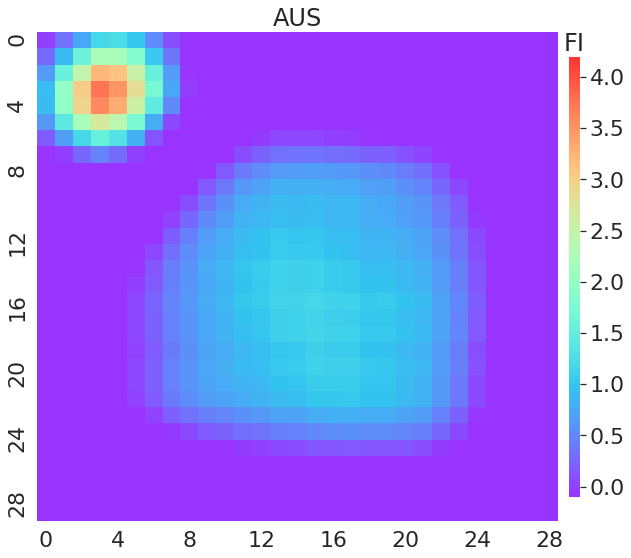

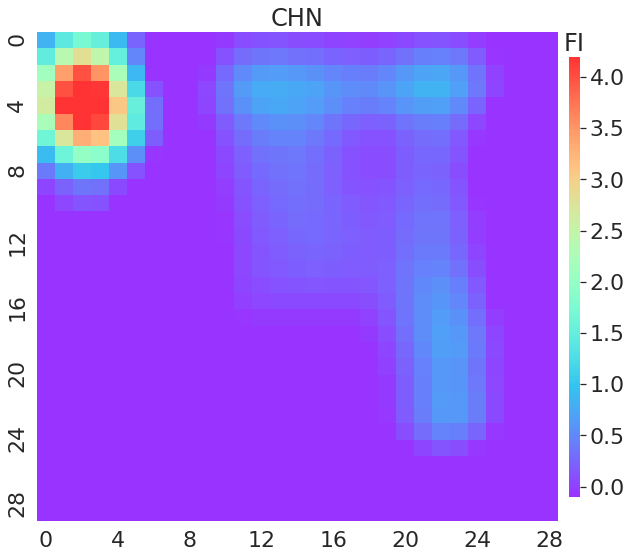

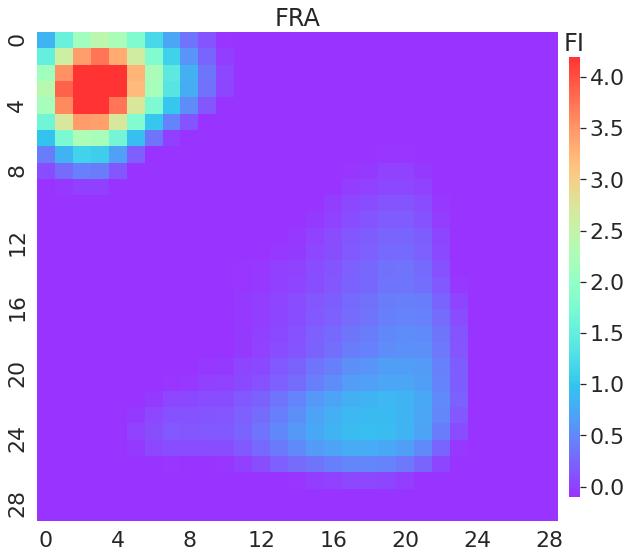

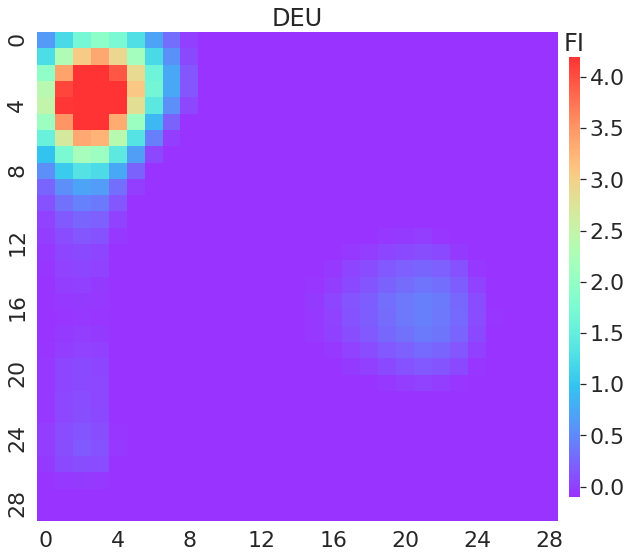

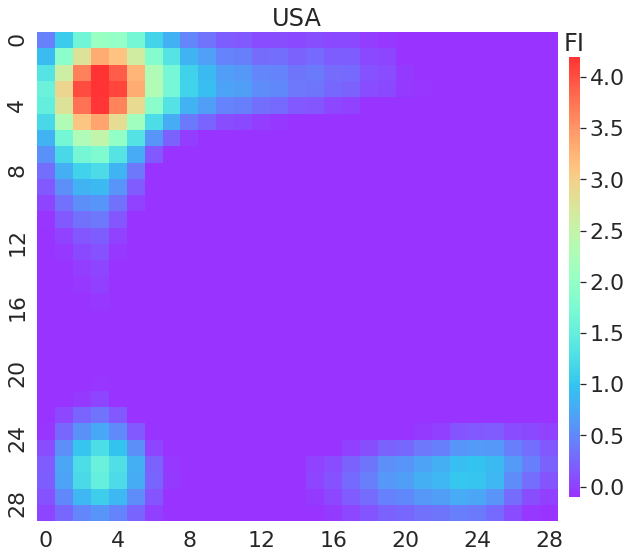

In [12]:
for country in dfi.columns:    
    sns.set(style='white',  font='sans-serif', font_scale=2)
    fig, ax  = plt.subplots(1, 1, figsize=(10, 9))

    IMPM = dfi[country].values.reshape(*mp.fmap_shape)
    
    print(IMPM.max().round(1))
    sns.heatmap(IMPM,  
                cmap = 'rainbow', alpha = 0.8, xticklabels=4, ax =ax,
                yticklabels=4, vmin = -0.1, vmax = 4.2,
                cbar_kws = {'fraction':0.046, 'shrink':0.9, 'aspect': 40, 'pad':0.02, })

    bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)

    ax.set_title(country)
    cbar = ax.collections[0].colorbar
    cbar.ax.set_title('FI')
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
    
    plt.subplots_adjust(wspace = 0.18)

    plt.savefig('./results/FI_%s.png' % country, dpi = 400, bbox_inches="tight")


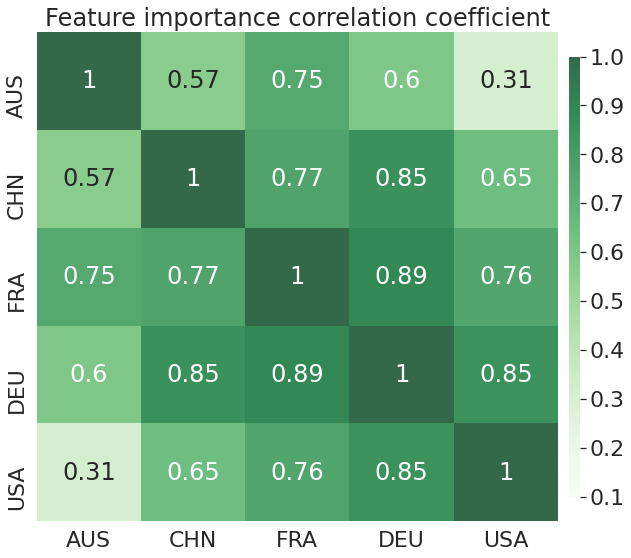

In [28]:
sns.set(style='white',  font='sans-serif', font_scale=2)
fig, ax  = plt.subplots(1, 1, figsize=(10, 9))

IMPM = dfi.corr()
sns.heatmap(IMPM,  
            yticklabels = IMPM.columns, # xticklabels=4,yticklabels=4,
            xticklabels = IMPM.columns,
            cmap = 'Greens', alpha = 0.8, ax =ax,
            vmin = 0.1, annot = True,
            cbar_kws = {'fraction':0.046, 'shrink':0.9, 'aspect': 40, 'pad':0.02, })


ax.set_title("Feature importance correlation coefficient")


plt.subplots_adjust(wspace = 0.18)
plt.savefig('./results/FI_all_corr.png', dpi = 400, bbox_inches="tight")

In [29]:
df_save = all_importance['CHI'][['x', 'y', 'v', 'Subtypes', 'colors', ]].join(dfi)

In [30]:
df_save = df_save.set_index('v')

In [31]:
df_save['5_countries_average_importance'] = dfi.mean(axis=1).values

In [32]:
df_save = df_save.sort_values('5_countries_average_importance', ascending = False)
df_save = df_save.join(mp.df_embedding[['x','y']].rename(columns = {'x':'scatter_x','y':'scatter_y'}))


In [33]:
df_save.sort_values('5_countries_average_importance', ascending = False).head(15)[['x', 'y',  'Subtypes', '5_countries_average_importance']]

,x,y,Subtypes,5_countries_average_importance
v,,,,
Anaerococcus obesiensis/vaginalis [ref_mOTU_v2_0429],3,3,cluster_02,4.564940
Clostridiales bacterium S5-A14a [meta_mOTU_v2_5486],3,4,cluster_02,4.431694
Fusobacterium nucleatum s. nucleatum [ref_mOTU_v2_0777],2,3,cluster_03,4.360258
Streptococcus constellatus/intermedius [ref_mOTU_v2_0143],2,4,cluster_05,4.292959
Prevotella nigrescens [ref_mOTU_v2_0276],3,2,cluster_03,4.100096
Fusobacterium sp. oral taxon 370 [ref_mOTU_v2_1403],2,2,cluster_03,3.817932
unknown Porphyromonas [meta_mOTU_v2_6490],4,3,cluster_02,3.788346
Porphyromonas uenonis [ref_mOTU_v2_4616],4,4,cluster_02,3.592019
Fusobacterium gonidiaformans [ref_mOTU_v2_1404],3,5,cluster_03,3.587572


In [35]:
from scipy.stats import pearsonr

In [36]:
pccs = []
ps = []
for i in dfi.columns:
    for j in dfi.columns:
        pcc, p = pearsonr(dfi[i], dfi[j])
        pccs.append(pcc)
        ps.append(p)

In [37]:
df1 = pd.DataFrame(np.array(pccs).reshape(5,5), columns = dfi.columns, index = dfi.columns)

In [38]:
df2 = pd.DataFrame(np.array(ps).reshape(5,5), columns = dfi.columns, index = dfi.columns)

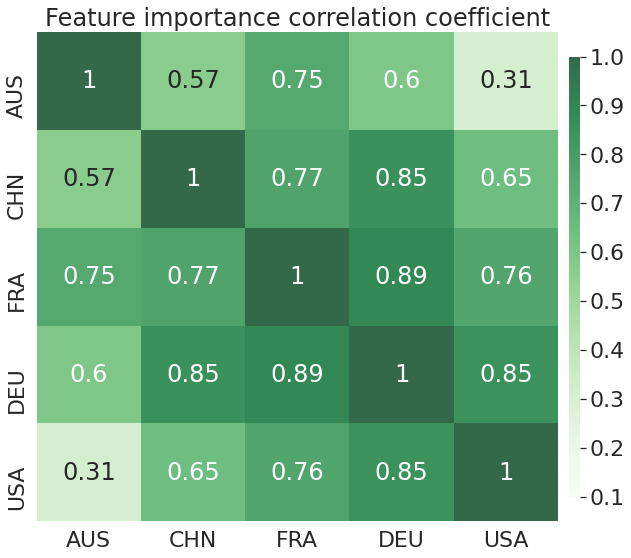

In [39]:
sns.set(style='white',  font='sans-serif', font_scale=2)
fig, ax  = plt.subplots(1, 1, figsize=(10, 9))


sns.heatmap(df1,  
            yticklabels = df1.columns, # xticklabels=4,yticklabels=4,
            xticklabels = df1.columns,
            cmap = 'Greens', alpha = 0.8, ax =ax,
            vmin = 0.1, annot = True,
            cbar_kws = {'fraction':0.046, 'shrink':0.9, 'aspect': 40, 'pad':0.02, })


ax.set_title("Feature importance correlation coefficient")


plt.subplots_adjust(wspace = 0.18)
#plt.savefig('./model/all.svg', dpi = 400, bbox_inches="tight")

In [40]:
f1 = df_save.sort_values('5_countries_average_importance', ascending = False)

In [41]:
#f1 = f1.head(20)
#f = f1.reset_index(drop = True)
#f.index = f.index.map(lambda x:'microbe-%s' % str(x+1).zfill(2))

N = 20
f = f1.head(N)
f['genus'] = f.index.map(lambda x:x.split(' ')[0].replace(']',''))
f.genus.iloc[0] = 'Dialister'
f['species'] = f.index.map(lambda x:x.split(' [')[0])

f.index = f.index.map(lambda x:x.split(' [')[-1].replace(']',''))

f['species'] = f['species'] + '\n' + f.index

In [42]:
# f['species'] = ['unknown Dialister',
#  'Fusobacterium nucleatum s. vincentii',
#  'Anaerococcus obesiensis',
#  'Parvimonas sp.1',
#  'Parvimonas sp.2',
#  'Peptostreptococcus anaerobius',
#  'Alloprevotella tannerae',
#  'Fusobacterium nucleatum s. animalis',
#  'Prevotella oris',
#  'Porphyromonas somerae ',
#  'Clostridiales bacterium S5-A14a',
#  'Pyramidobacter piscolens',
#  'Prevotella intermedia',
#  'Fusobacterium gonidiaformans',
#  'Parvimonas micra',
#  'Solobacterium moorei',
#  'Porphyromonas uenonis',
#  'Streptococcus anginosus',
#  'Streptococcus constellatus',
#  'Streptococcus anginosus ']

In [44]:
! pip install statannot

  Using cached statannot-0.2.3-py3-none-any.whl (10 kB)


In [45]:
from statannot import add_stat_annotation
cols = f1.index.tolist()
ncols = f.index.tolist()

y  = 'log10 Intensity'
hue = 'Group' 
x = 'Microbial species'


all_data = []
for col, ncol in zip(cols, ncols):
    v = dfx[col]
    #x = mp.StandardScaler(x,  x.mean(), x.std())
    dfd = v.to_frame(name = y).join(dfy_all['Group'].to_frame(name = hue))
    dfd[x] = ncol
    all_data.append(dfd)

In [46]:
data = pd.concat(all_data, axis=0)
data[x] = data[x]


box_pairs = [((col, "CRC"), (col, "CTR")) for col in pd.Series(ncols).map(lambda x:x.split(' [')[-1].replace(']',''))]
order = ncols

#****P < 0.0001 by two-tailed Wilcoxon rank sum test.

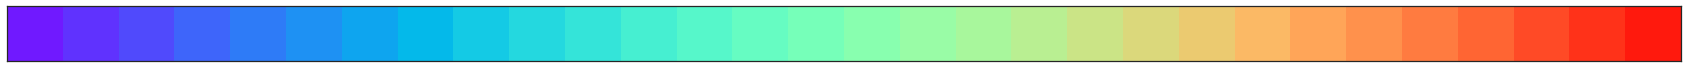

In [47]:
color = sns.color_palette('rainbow', len(f) + 10).as_hex()
sns.palplot(color)

In [48]:
# coldic = pd.Series(color, index = f.groupby('genus').size().sort_values().index).to_dict()
# f['color'] = f['genus'].map(coldic)

In [49]:
sns.set(style='white',  font='sans-serif', font_scale=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ref_mOTU_v2_0351_CTR v.s. ref_mOTU_v2_0351_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.802e-02 U_stat=3.854e+04
ref_mOTU_v2_0148_CTR v.s. ref_mOTU_v2_0148_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.749e-05 U_stat=3.696e+04
ref_mOTU_v2_1136_CTR v.s. ref_mOTU_v2_1136_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.594e-02 U_stat=3.848e+04
ref_mOTU_v2_0687_CTR v.s. ref_mOTU_v2_0687_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.332e-01 U_stat=3.885e+04
ref_mOTU_v2_0776_CTR v.s. ref_mOTU_v2_0776_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=2.652e-19 U_stat=2.818e+04
ref_mOTU_v2_1145_CTR v.s. ref_mOTU_v2_1145_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=5.340e-23 U_stat=2.406e+04
ref_mOTU_v2_2102_CTR v.s. ref_mOTU_v2_2102_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.073e-07 U_stat=3.650e+04
met

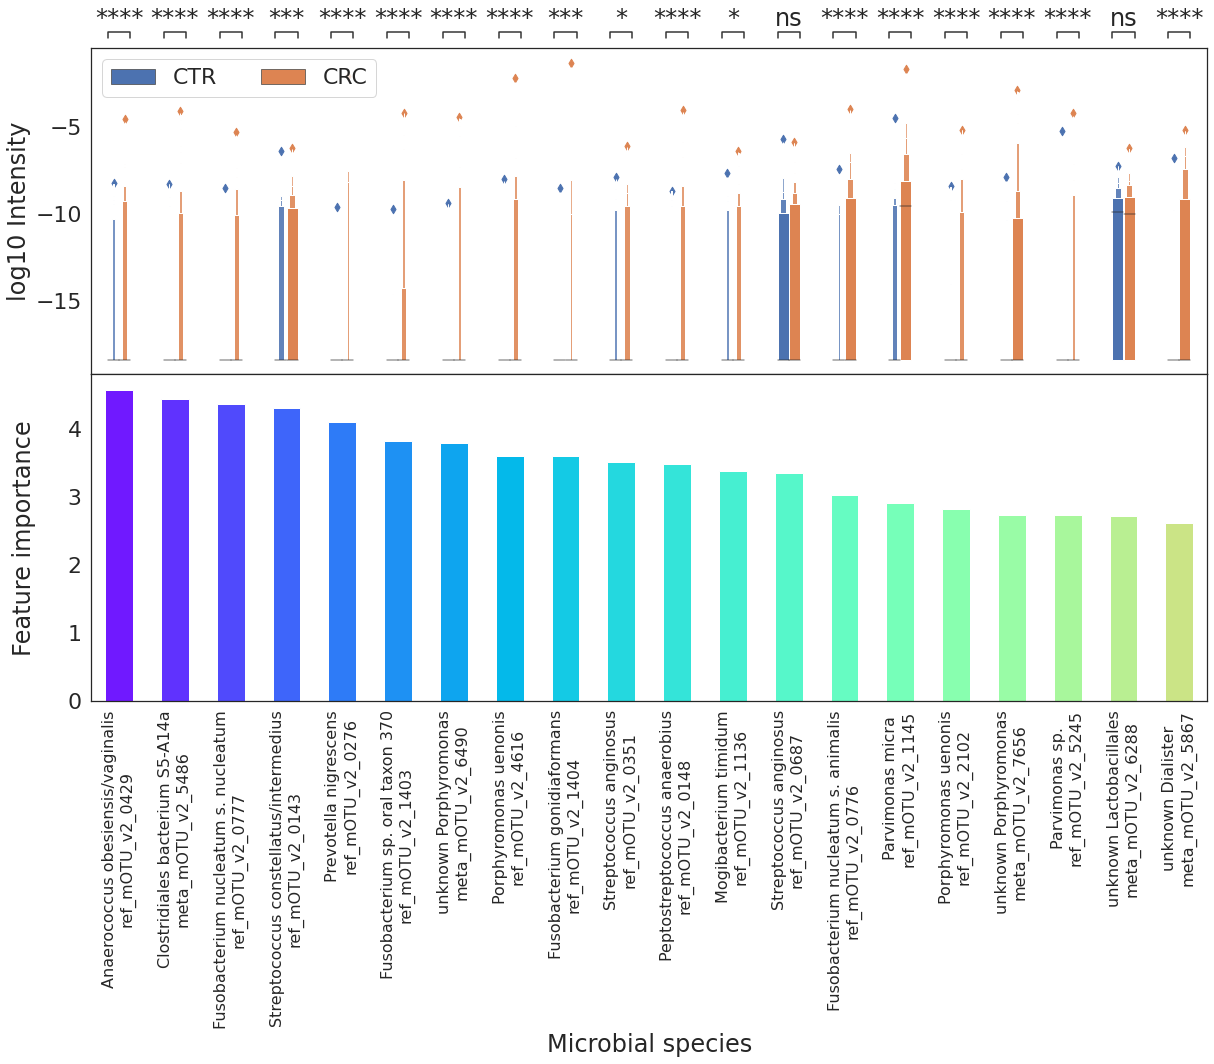

In [50]:
fig, ax  = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

ax, ax2 = ax
# g = sns.swarmplot(x=x, y=y, hue = hue, data=data, color= ".2", order = order, ax= ax, size = 6,
#                      split=True,   linewidth=1, edgecolor='gray') #palette="Set2",palette = [".8", ".8"] jitter=True,
    
flierprops = dict(marker = 'o',markerfacecolor='0.75', markersize=5, linestyle='none')
    
sns.boxenplot(data = data,y=y, x = x, hue = hue,  ax = ax, width = 0.4, saturation = 1,
              #k_depth = "proportion" , scale = 'linear', 
              order = order) # palette="Set1_r", , flierprops = flierprops

ax, test_results = add_stat_annotation(ax, data=data, x=x, y=y, hue = hue, test='Mann-Whitney', 
                                       box_pairs=box_pairs, comparisons_correction=None,
                                       text_format='star', loc='outside', verbose=2)
ax.set_ylabel(y,)

#ax.set_ylim(-10, -2)


ax.legend(loc='upper left',fancybox=True,  ncol=2)

p = f['5_countries_average_importance'].tolist()
p = [{i: j} for i, j in enumerate(p)]
p = pd.DataFrame(p, index = f.index)
p.plot(kind ='bar',stacked=True, ax = ax2, color = color, legend=False, )

ax2.set_ylabel('Feature importance', labelpad = 32)
ax2.set_xlabel(x)
ax2.set_xticklabels(labels = f.species.tolist(), rotation=90, ha='center', fontsize = 16)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.000)
plt.savefig('./results/statistic_test.png', dpi=400, bbox_inches='tight')

In [53]:
from scipy.stats import mannwhitneyu

In [58]:
p_values = []
for c in df_save.index:
    if not 'NaN-' in c:
        v1 = dfx[[c]]
        v2 = dfy[['CTR']]
        xx = v1.join(v2).groupby('CTR')[c].apply(lambda x:x.to_list())    
        s, p = mannwhitneyu(xx[0], xx[1], alternative='two-sided')
        p_values.append(p)
    else:
        p_values.append(None)

In [59]:
df_save['mannwhitneyu_p-value'] = p_values
df_save = df_save.rename(columns = {'x':'grid_x','y':'grid_y'})
df_save = df_save[['scatter_x', 'scatter_y', 'grid_x', 'grid_y', 'Subtypes', 'colors', 'AUS', 'CHN', 'FRA', 'DEU', 
                   'USA', '5_countries_average_importance', 'mannwhitneyu_p-value']]

df_save = df_save.sort_values('5_countries_average_importance',ascending=False)

df_save.to_excel('./results/feature_importance.xlsx')


In [60]:
df_save.head(10)

,scatter_x,scatter_y,grid_x,grid_y,Subtypes,colors,AUS,CHN,FRA,DEU,USA,5_countries_average_importance,mannwhitneyu_p-value
v,,,,,,,,,,,,,
Anaerococcus obesiensis/vaginalis [ref_mOTU_v2_0429],-2.386618,-4.969970,3,3,cluster_02,#08ff00,3.740643,4.182530,5.008007,5.352081,4.541437,4.564940,1.094188e-07
Clostridiales bacterium S5-A14a [meta_mOTU_v2_5486],-2.298511,-4.886161,3,4,cluster_02,#08ff00,3.592521,4.547896,4.539789,5.307028,4.171234,4.431694,1.485820e-05
Fusobacterium nucleatum s. nucleatum [ref_mOTU_v2_0777],-2.777738,-5.414148,2,3,cluster_03,#00fff6,3.026869,4.678922,4.910481,5.167032,4.017988,4.360258,3.542412e-10
Streptococcus constellatus/intermedius [ref_mOTU_v2_0143],-3.334739,-4.457049,2,4,cluster_05,#ee00ff,2.957951,4.978458,4.525385,5.249964,3.753036,4.292959,1.323035e-04
Prevotella nigrescens [ref_mOTU_v2_0276],-2.729902,-5.417083,3,2,cluster_03,#00fff6,3.211352,3.526966,4.804353,4.708198,4.249610,4.100096,3.378500e-09
Fusobacterium sp. oral taxon 370 [ref_mOTU_v2_1403],-2.785563,-5.442452,2,2,cluster_03,#00fff6,2.476730,3.989865,4.567605,4.408877,3.646582,3.817932,1.858199e-09
unknown Porphyromonas [meta_mOTU_v2_6490],-2.298215,-4.900092,4,3,cluster_02,#08ff00,3.526996,2.726782,4.242285,4.372265,4.073399,3.788346,8.744910e-08
Porphyromonas uenonis [ref_mOTU_v2_4616],-2.268646,-4.862103,4,4,cluster_02,#08ff00,3.313791,3.072735,3.737899,4.195477,3.640193,3.592019,3.294640e-11
Fusobacterium gonidiaformans [ref_mOTU_v2_1404],-2.323894,-4.867766,3,5,cluster_03,#00fff6,2.697424,4.056273,3.416817,4.377318,3.390030,3.587572,2.352671e-04
